 BBC Sports Dataset(Text processing) 


#1- Loading file into drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1.2 Making test and train directories for all the classes 

In [ ]:
import os
#PLEASE CHANGE THE PATH BEFORE EXECUTING
base_dir = "/content/drive/My Drive/bbc/"
root_dir = "/content/drive/My Drive/bbc/"

In [ ]:
# !pip install split-folders

In [ ]:
# import splitfolders  # or import split_folders

# Split val/test with a fixed number of items e.g. 100 for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
#splitfolders.fixed(base_dir, output=root_dir, seed=1337, fixed=(20, 20), group_prefix=None) # default values

In [ ]:
train_dir = os.path.join(root_dir,'train')
val_dir= os.path.join(root_dir,'val')
test_dir = os.path.join(root_dir,'test')


In [ ]:
os.listdir(train_dir)

['sport', 'entertainment', 'tech', 'politics', 'business']

#2- Preprocessing on Text data 

##2.1- Laoding data from folders and assigning them labels

In [ ]:
from sklearn.datasets import load_files
train_data = load_files(train_dir)
xi_train, yi_train = train_data.data, train_data.target
val_data = load_files(val_dir)
xi_val, yi_val = val_data.data, val_data.target
test_data = load_files(test_dir)
xi_test, yi_test = test_data.data, test_data.target

In [ ]:
xi_test[1:2]

[b"A question of trust and technology\n\nA major government department is without e-mail for a week, and technology analyst Bill Thompson wants to know what happened.\n\nA couple of weeks ago I wrote about how my girlfriend had suffered when her cable modem blew up and she was offline for several days. It seems that thousands of civil servants at the UK's Department of Work and Pensions went through the same thing last week. It has emerged that the internal network crashed in a particularly horrible way, depriving staff of e-mail and access to the application software they use to calculate people's benefit and pension entitlement or note changes in personal circumstances. Senior consultants from EDS, the computer firm which manage the system, and Microsoft, which supplied the software, were running around trying to figure out what had to be done to fix it all, while staff resorted to phone, fax and probably carrier pigeon to get work done. Fortunately the back-office systems which actu

##2.2- Data cleaning by NLTK

In [ ]:

from nltk.stem import WordNetLemmatizer
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords

def preprocessing(X):
  documents = []
  stemmer = WordNetLemmatizer()
  
  for sen in range(0, len(X)):
      # Remove all the special characters
      document = re.sub(r'\W', ' ', str(X[sen]))
    
      # remove all single characters
      document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
      # Remove single characters from the start
      document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
      # Remove next line 
      document = re.sub('\n', '', document)

      # Substituting multiple spaces with single space
      document = re.sub(r'\s+', ' ', document, flags=re.I)
    
      # Removing prefixed 'b'
      document = re.sub(r'^b\s+', '', document)
    
      # Converting to Lowercase
      document = document.lower()
    
      # Lemmatization
      document = document.split()

      document = [stemmer.lemmatize(word) for word in document]
      document = ' '.join(document)

      documents.append(document)
  return documents

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
nltk.download('omw-1.4')
xc_train = preprocessing(xi_train)


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
xc_val = preprocessing(xi_val)
xc_test = preprocessing(xi_test)

##2.3- Printing Values before and after cleaning

In [ ]:
print('-'*50)
print('Before applying Preprocessing tasks')
print('-'*50)
print(xi_train[5:10])

print()
print('-'*50)
print('After Removing Stopwords Function')
print('-'*50)
print(xc_train[5:10])


--------------------------------------------------
Before applying Preprocessing tasks
--------------------------------------------------
[b'SEC to rethink post-Enron rules\n\nThe US stock market watchdog\'s chairman has said he is willing to soften tough new US corporate governance rules to ease the burden on foreign firms.\n\nIn a speech at the London School of Economics, William Donaldson promised "several initiatives". European firms have protested that US laws introduced after the Enron scandal make Wall Street listings too costly. The US regulator said foreign firms may get extra time to comply with a key clause in the Sarbanes-Oxley Act.\n\nThe Act comes into force in mid-2005. It obliges all firms with US stock market listings to make declarations, which, critics say, will add substantially to the cost of preparing their annual accounts.\n\nFirms that break the new law could face huge fines, while senior executives risk jail terms of up to 20 years. Mr Donaldson said that altho

##2.4- Converting the text files to vectors 

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
max_feature = 4500
maxlen=200
#vectorizer = CountVectorizer(max_features=max_feature, stop_words=stopwords.words('english'))
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=max_feature)
tokenizer.fit_on_texts(xc_train)
sequences = tokenizer.texts_to_sequences(xc_train)
x_train = pad_sequences(sequences, maxlen=maxlen)
sequences = tokenizer.texts_to_sequences(xc_test)
x_test = pad_sequences(sequences, maxlen=maxlen)
sequences = tokenizer.texts_to_sequences(xc_val)
x_val = pad_sequences(sequences, maxlen=maxlen)

print(x_train.shape)
print(x_val.shape)

(2025, 200)
(100, 200)


In [ ]:
#x_train = vectorizer.fit_transform(xc_train).toarray()
#x_test = vectorizer.fit_transform(xc_test).toarray()
#x_val = vectorizer.fit_transform(xc_val).toarray()

In [ ]:
x_train.shape

(2025, 200)

##2.5- Label Encoding

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
y_train = labelencoder.fit_transform(yi_train)
y_test = labelencoder.fit_transform(yi_test)
y_val = labelencoder.fit_transform(yi_val)

from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
print('the shape of training data')
print('-'*40)
print(x_train.shape)
print(y_train.shape)
print()

print('the shape of validation data')
print('-'*40)
print(x_val.shape)
print(y_val.shape)
print()

print('the shape of test data')
print('-'*40)
print(x_test.shape)
print(y_test.shape)


the shape of training data
----------------------------------------
(2025, 200)
(2025, 5)

the shape of validation data
----------------------------------------
(100, 200)
(100, 5)

the shape of test data
----------------------------------------
(100, 200)
(100, 5)


#Task1 Fully Connected Dense NN

##1 training model on 10 epochs and reporting accuracy

In [ ]:
from keras import models
from keras import layers
dnn = models.Sequential()
dnn.add(layers.Dense(128, activation = 'relu', input_shape=(x_train.shape[1],)))
dnn.add(layers.Dense(64, activation = 'relu'))
dnn.add(layers.Dense(32, activation = 'relu'))
dnn.add(layers.Dense(16, activation = 'relu'))
dnn.add(layers.Dense(5, activation = 'softmax'))


dnn.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
          

history = dnn.fit(x_train,
                  y_train,
                    epochs=10,
                    batch_size=40,
                    validation_data=(x_val, y_val))

Epoch 1/10
51/51 [==============================] - 3s 10ms/step - loss: 79.4535 - accuracy: 0.1916 - val_loss: 2.9207 - val_accuracy: 0.2100
Epoch 2/10
51/51 [==============================] - 0s 5ms/step - loss: 2.2486 - accuracy: 0.2207 - val_loss: 1.6099 - val_accuracy: 0.2000
Epoch 3/10
51/51 [==============================] - 0s 5ms/step - loss: 1.6676 - accuracy: 0.2336 - val_loss: 1.5954 - val_accuracy: 0.1700
Epoch 4/10
51/51 [==============================] - 0s 4ms/step - loss: 1.6294 - accuracy: 0.2331 - val_loss: 1.6109 - val_accuracy: 0.2000
Epoch 5/10
51/51 [==============================] - 0s 4ms/step - loss: 1.6012 - accuracy: 0.2356 - val_loss: 1.6116 - val_accuracy: 0.2000
Epoch 6/10
51/51 [==============================] - 0s 4ms/step - loss: 1.5974 - accuracy: 0.2356 - val_loss: 1.6122 - val_accuracy: 0.2000
Epoch 7/10
51/51 [==============================] - 0s 4ms/step - loss: 1.6679 - accuracy: 0.2370 - val_loss: 1.6129 - val_accuracy: 0.2000
Epoch 8/10
51/51 [

##2 Plotting traning and val accuracy

In [ ]:
for key in history.history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


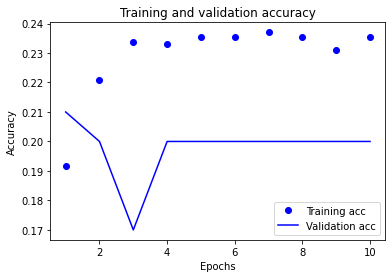

In [ ]:
import matplotlib.pyplot as plt

acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

##3- Reporting test and val accuracy 

In [ ]:
test_loss, test_acc = dnn.evaluate(x_test, y_test)
print('Testing accuracy for the model')
print('-'*20)
print('test acc:', test_acc)

4/4 [==============================] - 0s 4ms/step - loss: 1.6065 - accuracy: 0.2000
Testing accuracy for the model
--------------------
test acc: 0.20000000298023224


#Task2- Using Word Embedding 

In [ ]:
from keras import preprocessing

import tensorflow as tf
# Cut texts after this number of words 
# (among top max_features most common words)
#maxlen = 120
max_feature =4500
emb_dim = 200



x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_val = tf.keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,maxlen=maxlen)

x_train.shape

(2025, 200)

In [ ]:
from keras.layers import Flatten, Dense
from keras.layers import Embedding

enn = models.Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
enn.add(Embedding(max_feature, emb_dim, input_length=maxlen))
enn.add(Flatten())
enn.add(layers.Dense(128, activation = 'relu'))
enn.add(layers.Dense(64, activation = 'relu'))
enn.add(layers.Dense(32, activation = 'relu'))
enn.add(layers.Dense(16, activation = 'relu'))
enn.add(layers.Dense(5, activation = 'softmax'))


enn.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = enn.fit(x_train,
                  y_train,
                    epochs=10,
                    batch_size=40,
                    validation_data=(x_val, y_val))


Epoch 1/10
51/51 [==============================] - 1s 10ms/step - loss: 1.1348 - accuracy: 0.5427 - val_loss: 0.5510 - val_accuracy: 0.7900
Epoch 2/10
51/51 [==============================] - 0s 6ms/step - loss: 0.0848 - accuracy: 0.9812 - val_loss: 0.3239 - val_accuracy: 0.8400
Epoch 3/10
51/51 [==============================] - 0s 6ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.2706 - val_accuracy: 0.9000
Epoch 4/10
51/51 [==============================] - 0s 6ms/step - loss: 7.6980e-05 - accuracy: 1.0000 - val_loss: 0.2503 - val_accuracy: 0.8900
Epoch 5/10
51/51 [==============================] - 0s 6ms/step - loss: 3.9901e-06 - accuracy: 1.0000 - val_loss: 0.2485 - val_accuracy: 0.9000
Epoch 6/10
51/51 [==============================] - 0s 6ms/step - loss: 2.7433e-07 - accuracy: 1.0000 - val_loss: 0.2799 - val_accuracy: 0.8900
Epoch 7/10
51/51 [==============================] - 0s 6ms/step - loss: 2.9964e-08 - accuracy: 1.0000 - val_loss: 0.2974 - val_accuracy: 0.8800
Epo

##Reporting test and val accuracy 

In [ ]:
test_loss, test_acc = enn.evaluate(x_test, y_test)
print('Testing accuracy for the model')
print('-'*20)
print('test acc:', test_acc)


4/4 [==============================] - 0s 4ms/step - loss: 0.6026 - accuracy: 0.8900
Testing accuracy for the model
--------------------
test acc: 0.8899999856948853


#Task3- Using Glove Embedding With Dense Network 

In [ ]:
glove_path = '/content/drive/MyDrive/glove.6B.100d.txt'

embeddings_index = {}
f = open(glove_path)
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences

from keras import preprocessing
# Cut texts after this number of words 
# (among top max_features most common words)
max_feature =4500
emb_dim = 100
# Load the data as lists of integers.
tokenizer = Tokenizer(num_words=max_feature)
tokenizer.fit_on_texts(xc_train)
sequences = tokenizer.texts_to_sequences(xc_train)
word_index = tokenizer.word_index
#print('Found %s unique tokens.' % len(word_index))
X = pad_sequences(sequences, maxlen=maxlen)

embedding_matrix = np.zeros((max_feature, emb_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_feature:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector
    

x_train.shape

(2025, 200)

In [ ]:
from keras.layers import Flatten, Dense
from keras.layers import Embedding

gnn = models.Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
gnn.add(Embedding(max_feature, emb_dim, input_length=maxlen))
gnn.add(Flatten())
gnn.add(layers.Dense(128, activation = 'relu'))
gnn.add(layers.Dense(64, activation = 'relu'))
gnn.add(layers.Dense(32, activation = 'relu'))
gnn.add(layers.Dense(16, activation = 'relu'))
gnn.add(layers.Dense(5, activation = 'softmax'))

gnn.layers[0].set_weights([embedding_matrix])
gnn.layers[0].trainable = False


gnn.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = gnn.fit(x_train,
                  y_train,
                    epochs=10,
                    batch_size=40,
                    validation_data=(x_val, y_val))


Epoch 1/10
51/51 [==============================] - 1s 10ms/step - loss: 1.7568 - accuracy: 0.3812 - val_loss: 1.3903 - val_accuracy: 0.4500
Epoch 2/10
51/51 [==============================] - 0s 5ms/step - loss: 0.6719 - accuracy: 0.7694 - val_loss: 0.7590 - val_accuracy: 0.7000
Epoch 3/10
51/51 [==============================] - 0s 4ms/step - loss: 0.3017 - accuracy: 0.8973 - val_loss: 0.5456 - val_accuracy: 0.8000
Epoch 4/10
51/51 [==============================] - 0s 4ms/step - loss: 0.1614 - accuracy: 0.9477 - val_loss: 0.1996 - val_accuracy: 0.9200
Epoch 5/10
51/51 [==============================] - 0s 4ms/step - loss: 0.3203 - accuracy: 0.9407 - val_loss: 0.2989 - val_accuracy: 0.9000
Epoch 6/10
51/51 [==============================] - 0s 4ms/step - loss: 0.1268 - accuracy: 0.9798 - val_loss: 0.2723 - val_accuracy: 0.8600
Epoch 7/10
51/51 [==============================] - 0s 5ms/step - loss: 0.0568 - accuracy: 0.9852 - val_loss: 0.2912 - val_accuracy: 0.8900
Epoch 8/10
51/51 [=

##Reporting test and val accuracy 

In [ ]:
test_loss, test_acc = gnn.evaluate(x_test, y_test)
print('Testing accuracy for the model')
print('-'*20)
print('test acc:', test_acc)


4/4 [==============================] - 0s 3ms/step - loss: 0.3166 - accuracy: 0.8800
Testing accuracy for the model
--------------------
test acc: 0.8799999952316284


#Task4- RNN with Embedding 

In [ ]:
from keras import preprocessing


# Cut texts after this number of words 
# (among top max_features most common words)
max_feature =4500
emb_dim = 100
# Load the data as lists of integers.

x_train.shape

(2025, 200)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

rnn = Sequential()
rnn.add(Embedding(4500, 64))
rnn.add(SimpleRNN(64, return_sequences=True))
rnn.add(SimpleRNN(32)) 
rnn.add(Dense(5, activation = 'softmax'))


rnn.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = rnn.fit(x_train,
                  y_train,
                    epochs=10,
                    batch_size=40,
                    validation_data=(x_val, y_val))


Epoch 1/10
51/51 [==============================] - 19s 333ms/step - loss: 1.6308 - accuracy: 0.2405 - val_loss: 1.5992 - val_accuracy: 0.3100
Epoch 2/10
51/51 [==============================] - 16s 318ms/step - loss: 1.2236 - accuracy: 0.5679 - val_loss: 1.5796 - val_accuracy: 0.3800
Epoch 3/10
51/51 [==============================] - 17s 341ms/step - loss: 0.5807 - accuracy: 0.8795 - val_loss: 1.7789 - val_accuracy: 0.3100
Epoch 4/10
51/51 [==============================] - 18s 351ms/step - loss: 0.1685 - accuracy: 0.9852 - val_loss: 1.8967 - val_accuracy: 0.4000
Epoch 5/10
51/51 [==============================] - 16s 315ms/step - loss: 0.0414 - accuracy: 0.9990 - val_loss: 2.1041 - val_accuracy: 0.2900
Epoch 6/10
51/51 [==============================] - 16s 312ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 2.5716 - val_accuracy: 0.3100
Epoch 7/10
51/51 [==============================] - 18s 357ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 2.7609 - val_accuracy: 0.2900

##Reporting test and val accuracy 

In [ ]:
test_loss, test_acc = rnn.evaluate(x_test, y_test)
print('Testing accuracy for the model')
print('-'*20)
print('test acc:', test_acc)


4/4 [==============================] - 0s 34ms/step - loss: 2.7855 - accuracy: 0.4700
Testing accuracy for the model
--------------------
test acc: 0.4699999988079071


#Task5- RNN with Glove 

In [ ]:
from keras import preprocessing


# Cut texts after this number of words 
# (among top max_features most common words)
max_feature =4500
emb_dim = 100
# Load the data as lists of integers.

x_train.shape

(2025, 200)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

grnn = Sequential()
grnn.add(Embedding(max_feature,emb_dim))
grnn.add(SimpleRNN(64, return_sequences=True))
grnn.add(SimpleRNN(32)) 
grnn.add(Dense(5, activation = 'softmax'))
grnn.layers[0].set_weights([embedding_matrix])
grnn.layers[0].trainable = False


grnn.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = grnn.fit(x_train,
                  y_train,
                    epochs=10,
                    batch_size=40,
                    validation_data=(x_val, y_val))


Epoch 1/10
51/51 [==============================] - 19s 342ms/step - loss: 1.5847 - accuracy: 0.2899 - val_loss: 1.4187 - val_accuracy: 0.3300
Epoch 2/10
51/51 [==============================] - 15s 303ms/step - loss: 1.1968 - accuracy: 0.5244 - val_loss: 1.0929 - val_accuracy: 0.5800
Epoch 3/10
51/51 [==============================] - 15s 303ms/step - loss: 0.9809 - accuracy: 0.6153 - val_loss: 1.3374 - val_accuracy: 0.4800
Epoch 4/10
51/51 [==============================] - 16s 309ms/step - loss: 0.8503 - accuracy: 0.6948 - val_loss: 1.8741 - val_accuracy: 0.3200
Epoch 5/10
51/51 [==============================] - 17s 336ms/step - loss: 0.7600 - accuracy: 0.7210 - val_loss: 0.9269 - val_accuracy: 0.6800
Epoch 6/10
51/51 [==============================] - 16s 309ms/step - loss: 0.6912 - accuracy: 0.7590 - val_loss: 0.6459 - val_accuracy: 0.8100
Epoch 7/10
51/51 [==============================] - 16s 306ms/step - loss: 0.7550 - accuracy: 0.7309 - val_loss: 1.4204 - val_accuracy: 0.5200

##Reporting test and val accuracy 

In [ ]:
test_loss, test_acc = grnn.evaluate(x_test, y_test)
print('Testing accuracy for the model')
print('-'*20)
print('test acc:', test_acc)


4/4 [==============================] - 0s 31ms/step - loss: 0.7066 - accuracy: 0.7500
Testing accuracy for the model
--------------------
test acc: 0.75


#Task6- LSTM with Embedding 

In [ ]:
from keras import preprocessing


# Cut texts after this number of words 
# (among top max_features most common words)
max_feature =4500
emb_dim = 100
# Load the data as lists of integers.

x_train.shape

(2025, 200)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM

lstm = Sequential()
lstm.add(Embedding(max_feature, emb_dim))
lstm.add(LSTM(64, return_sequences=True))
lstm.add(LSTM(32)) 
lstm.add(Dense(5, activation = 'softmax'))


lstm.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = lstm.fit(x_train,
                  y_train,
                    epochs=10,
                    batch_size=40,
                    validation_data=(x_val, y_val))


Epoch 1/10
51/51 [==============================] - 8s 32ms/step - loss: 1.3534 - accuracy: 0.3842 - val_loss: 1.1628 - val_accuracy: 0.3900
Epoch 2/10
51/51 [==============================] - 1s 16ms/step - loss: 1.0040 - accuracy: 0.5565 - val_loss: 0.8901 - val_accuracy: 0.6500
Epoch 3/10
51/51 [==============================] - 1s 17ms/step - loss: 0.6275 - accuracy: 0.7748 - val_loss: 0.5060 - val_accuracy: 0.8700
Epoch 4/10
51/51 [==============================] - 1s 16ms/step - loss: 0.3903 - accuracy: 0.8998 - val_loss: 0.6187 - val_accuracy: 0.8500
Epoch 5/10
51/51 [==============================] - 1s 16ms/step - loss: 0.2319 - accuracy: 0.9506 - val_loss: 0.5443 - val_accuracy: 0.8500
Epoch 6/10
51/51 [==============================] - 1s 16ms/step - loss: 0.1528 - accuracy: 0.9649 - val_loss: 0.5670 - val_accuracy: 0.8300
Epoch 7/10
51/51 [==============================] - 1s 17ms/step - loss: 0.0954 - accuracy: 0.9802 - val_loss: 0.6464 - val_accuracy: 0.8000
Epoch 8/10
51

##Reporting test and val accuracy 

In [ ]:
test_loss, test_acc = lstm.evaluate(x_test, y_test)
print('Testing accuracy for the model')
print('-'*20)
print('test acc:', test_acc)


4/4 [==============================] - 0s 10ms/step - loss: 0.5038 - accuracy: 0.8700
Testing accuracy for the model
--------------------
test acc: 0.8700000047683716


#Task7- LSTM with Glove Embedding 

In [ ]:
from keras import preprocessing


# Cut texts after this number of words 
# (among top max_features most common words)
max_feature =4500
emb_dim = 100
# Load the data as lists of integers.

x_train.shape

(2025, 200)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM

glstm = Sequential()
glstm.add(Embedding(max_feature, emb_dim))
glstm.add(LSTM(64, return_sequences=True))
glstm.add(LSTM(32)) 
glstm.add(Dense(5, activation = 'softmax'))
glstm.layers[0].set_weights([embedding_matrix])
glstm.layers[0].trainable = False


glstm.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = glstm.fit(x_train,
                  y_train,
                    epochs=10,
                    batch_size=40,
                    validation_data=(x_val, y_val))


Epoch 1/10
51/51 [==============================] - 4s 33ms/step - loss: 1.0821 - accuracy: 0.5985 - val_loss: 0.7312 - val_accuracy: 0.7500
Epoch 2/10
51/51 [==============================] - 1s 15ms/step - loss: 0.6012 - accuracy: 0.8148 - val_loss: 0.5567 - val_accuracy: 0.8200
Epoch 3/10
51/51 [==============================] - 1s 15ms/step - loss: 0.5424 - accuracy: 0.8321 - val_loss: 0.5204 - val_accuracy: 0.8500
Epoch 4/10
51/51 [==============================] - 1s 15ms/step - loss: 0.3972 - accuracy: 0.8854 - val_loss: 0.4911 - val_accuracy: 0.8500
Epoch 5/10
51/51 [==============================] - 1s 15ms/step - loss: 0.4615 - accuracy: 0.8568 - val_loss: 0.5541 - val_accuracy: 0.8100
Epoch 6/10
51/51 [==============================] - 1s 16ms/step - loss: 0.3377 - accuracy: 0.9052 - val_loss: 0.3288 - val_accuracy: 0.9000
Epoch 7/10
51/51 [==============================] - 1s 16ms/step - loss: 0.3581 - accuracy: 0.8993 - val_loss: 0.4296 - val_accuracy: 0.8700
Epoch 8/10
51

##Reporting test and val accuracy 

In [ ]:
test_loss, test_acc = glstm.evaluate(x_test, y_test)
print('Testing accuracy for the model')
print('-'*20)
print('test acc:', test_acc)


4/4 [==============================] - 0s 9ms/step - loss: 0.5169 - accuracy: 0.8400
Testing accuracy for the model
--------------------
test acc: 0.8399999737739563


#Task8- Bi LSTM with Embedding 

In [ ]:
from keras import preprocessing


# Cut texts after this number of words 
# (among top max_features most common words)
max_feature =4500
emb_dim = 100
# Load the data as lists of integers.

x_train.shape

(2025, 200)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Bidirectional
from keras.layers import LSTM

blstm = Sequential()
blstm.add(Embedding(max_feature, emb_dim))
blstm.add(Bidirectional(LSTM(64, return_sequences=True)))
blstm.add(Bidirectional(LSTM(32))) 
blstm.add(Dense(5, activation = 'softmax'))


blstm.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = blstm.fit(x_train,
                  y_train,
                    epochs=10,
                    batch_size=40,
                    validation_data=(x_val, y_val))


Epoch 1/10
51/51 [==============================] - 10s 84ms/step - loss: 1.3430 - accuracy: 0.4084 - val_loss: 0.9921 - val_accuracy: 0.6000
Epoch 2/10
51/51 [==============================] - 2s 32ms/step - loss: 0.7031 - accuracy: 0.7175 - val_loss: 0.7621 - val_accuracy: 0.7600
Epoch 3/10
51/51 [==============================] - 2s 30ms/step - loss: 0.3692 - accuracy: 0.8864 - val_loss: 0.3037 - val_accuracy: 0.9100
Epoch 4/10
51/51 [==============================] - 2s 30ms/step - loss: 0.1836 - accuracy: 0.9556 - val_loss: 0.1942 - val_accuracy: 0.9500
Epoch 5/10
51/51 [==============================] - 2s 31ms/step - loss: 0.1912 - accuracy: 0.9412 - val_loss: 0.3751 - val_accuracy: 0.9200
Epoch 6/10
51/51 [==============================] - 2s 31ms/step - loss: 0.0997 - accuracy: 0.9714 - val_loss: 0.1184 - val_accuracy: 0.9800
Epoch 7/10
51/51 [==============================] - 2s 31ms/step - loss: 0.0743 - accuracy: 0.9812 - val_loss: 0.1807 - val_accuracy: 0.9600
Epoch 8/10
5

##Reporting test and val accuracy 

In [ ]:
test_loss, test_acc = blstm.evaluate(x_test, y_test)
print('Testing accuracy for the model')
print('-'*20)
print('test acc:', test_acc)


4/4 [==============================] - 0s 14ms/step - loss: 0.5670 - accuracy: 0.8400
Testing accuracy for the model
--------------------
test acc: 0.8399999737739563


#Task9- BiLSTM with Glove Embedding 

In [ ]:
from keras import preprocessing


# Cut texts after this number of words 
# (among top max_features most common words)
max_feature =4500
emb_dim = 100
# Load the data as lists of integers.

x_train.shape

(2025, 200)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Bidirectional

gblstm = Sequential()
gblstm.add(Embedding(max_feature, emb_dim))
gblstm.add(Bidirectional(LSTM(64, return_sequences=True)))
gblstm.add(Bidirectional(LSTM(32))) 
gblstm.add(Dense(5, activation = 'softmax'))
gblstm.layers[0].set_weights([embedding_matrix])
gblstm.layers[0].trainable = False


gblstm.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = gblstm.fit(x_train,
                  y_train,
                    epochs=10,
                    batch_size=40,
                    validation_data=(x_val, y_val))


Epoch 1/10
51/51 [==============================] - 8s 58ms/step - loss: 0.9524 - accuracy: 0.6494 - val_loss: 0.7269 - val_accuracy: 0.7100
Epoch 2/10
51/51 [==============================] - 2s 30ms/step - loss: 0.4231 - accuracy: 0.8593 - val_loss: 0.4600 - val_accuracy: 0.8200
Epoch 3/10
51/51 [==============================] - 2s 30ms/step - loss: 0.3529 - accuracy: 0.8825 - val_loss: 0.7337 - val_accuracy: 0.7200
Epoch 4/10
51/51 [==============================] - 1s 29ms/step - loss: 0.3086 - accuracy: 0.8978 - val_loss: 0.4489 - val_accuracy: 0.8500
Epoch 5/10
51/51 [==============================] - 1s 29ms/step - loss: 0.2738 - accuracy: 0.9072 - val_loss: 0.4118 - val_accuracy: 0.9100
Epoch 6/10
51/51 [==============================] - 1s 29ms/step - loss: 0.2381 - accuracy: 0.9220 - val_loss: 0.1826 - val_accuracy: 0.9400
Epoch 7/10
51/51 [==============================] - 1s 29ms/step - loss: 0.1899 - accuracy: 0.9437 - val_loss: 0.2630 - val_accuracy: 0.8800
Epoch 8/10
51

##Reporting test and val accuracy 

In [ ]:
test_loss, test_acc = gblstm.evaluate(x_test, y_test)
print('Testing accuracy for the model')
print('-'*20)
print('test acc:', test_acc)


4/4 [==============================] - 0s 15ms/step - loss: 0.1930 - accuracy: 0.9300
Testing accuracy for the model
--------------------
test acc: 0.9300000071525574


#Task10- 1D CNN with Embedding

In [ ]:
from keras import preprocessing


# Cut texts after this number of words 
# (among top max_features most common words)
max_feature =4500
emb_dim = 100
# Load the data as lists of integers.

x_train.shape

(2025, 200)

In [ ]:

from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_feature, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(5))

model.summary()

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train,
                  y_train,
                    epochs=10,
                    batch_size=10,
                    validation_data=(x_val, y_val))


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 200, 128)          576000    
                                                                 
 conv1d (Conv1D)             (None, 194, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 38, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 32, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_26 (Dense)            (None, 5)               

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


203/203 [==============================] - 6s 7ms/step - loss: 1.6440 - acc: 0.2415 - val_loss: 1.5299 - val_acc: 0.2700
Epoch 2/10
203/203 [==============================] - 1s 5ms/step - loss: 1.5470 - acc: 0.3091 - val_loss: 1.5265 - val_acc: 0.2100
Epoch 3/10
203/203 [==============================] - 1s 5ms/step - loss: 1.5293 - acc: 0.3748 - val_loss: 1.5261 - val_acc: 0.2100
Epoch 4/10
203/203 [==============================] - 1s 5ms/step - loss: 1.5106 - acc: 0.4005 - val_loss: 1.5153 - val_acc: 0.3600
Epoch 5/10
203/203 [==============================] - 1s 5ms/step - loss: 1.4913 - acc: 0.4933 - val_loss: 1.5098 - val_acc: 0.4000
Epoch 6/10
203/203 [==============================] - 1s 5ms/step - loss: 1.4700 - acc: 0.5694 - val_loss: 1.4989 - val_acc: 0.3100
Epoch 7/10
203/203 [==============================] - 1s 5ms/step - loss: 1.4461 - acc: 0.5812 - val_loss: 1.4784 - val_acc: 0.4100
Epoch 8/10
203/203 [==============================] - 1s 5ms/step - loss: 1.4217 - acc:

##Reporting test and val accuracy 

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Testing accuracy for the model')
print('-'*20)
print('test acc:', test_acc)


4/4 [==============================] - 0s 49ms/step - loss: 1.4027 - acc: 0.5100
Testing accuracy for the model
--------------------
test acc: 0.5099999904632568


#Task 12 : Reporting Accuracies 

In [ ]:
from google.colab import files 
from IPython.display import Image

In [ ]:
#upload = files.upload()

In [ ]:
# Image('assignment 5 accuracies.JPG', width = 600)

**Transformer**

In [ ]:
import os, pathlib, shutil, random
from tensorflow import keras
batch_size = 32
import os
os.chdir("/content/drive/My Drive/bbc/")
val_dir = "val"
train_dir = "train"
categories = os.listdir("train")

train_ds = keras.utils.text_dataset_from_directory(
    "train", batch_size=batch_size
)
val_ds = keras.utils.text_dataset_from_directory(
    "val", batch_size=batch_size
)
test_ds = keras.utils.text_dataset_from_directory(
    "test", batch_size=batch_size
)
text_only_train_ds = train_ds.map(lambda x, y: x)

Found 2025 files belonging to 5 classes.
Found 100 files belonging to 5 classes.
Found 100 files belonging to 5 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

In [ ]:
from tensorflow.keras import layers

max_length = 600
max_tokens = 20000
text_vectorization = layers.TextVectorization(
    max_tokens=max_tokens,
    output_mode="int",
    output_sequence_length=max_length,
)
text_vectorization.adapt(text_only_train_ds)

int_train_ds = train_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
int_val_ds = val_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)
int_test_ds = test_ds.map(
    lambda x, y: (text_vectorization(x), y),
    num_parallel_calls=4)

In [ ]:
#Performance Metrics
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
vocab_size = 20000
embed_dim = 256
num_heads = 2
dense_dim = 32

inputs = keras.Input(shape=(None,), dtype="int64")
x = layers.Embedding(vocab_size, embed_dim)(inputs)
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", f1_m, precision_m, recall_m])
model.summary()

callbacks = [
    keras.callbacks.ModelCheckpoint("task1_a.keras",
                                    save_best_only=True)
]
model.fit(int_train_ds, validation_data=int_val_ds, epochs=5, callbacks=callbacks)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_12 (Embedding)    (None, None, 256)         5120000   
                                                                 
 transformer_encoder_2 (Tran  (None, None, 256)        543776    
 sformerEncoder)                                                 
                                                                 
 global_max_pooling1d_3 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_35 (Dense)            (None, 5)                 1285

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(int_test_ds)
print(accuracy)

4/4 [==============================] - 1s 31ms/step - loss: 0.0496 - accuracy: 0.9800 - f1_m: 0.8944 - precision_m: 0.8034 - recall_m: 1.0096
0.9800000190734863
